In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score,make_scorer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
X=pd.read_csv('wine-clustering.csv')
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [24]:
X.isna().values.any()

False

In [25]:
X_train,X_test=train_test_split(X,test_size=0.3,random_state=42)
scaler=StandardScaler()

In [26]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [27]:
wcss=[]
for k in range(1,21):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
print(wcss)

[1612.0, 1153.283664508292, 893.3278153378172, 850.7226242301257, 756.9359476460916, 723.3438971147325, 697.18873920796, 619.8684943155349, 618.9805264966587, 583.3218627792602, 554.6269992862697, 550.3652484912413, 490.14245379456077, 490.0797980025109, 481.40779413872855, 484.99681472670335, 457.42770340935664, 434.2769422163327, 415.46272543543546, 403.89644956212504]


Text(0, 0.5, 'WCSS value')

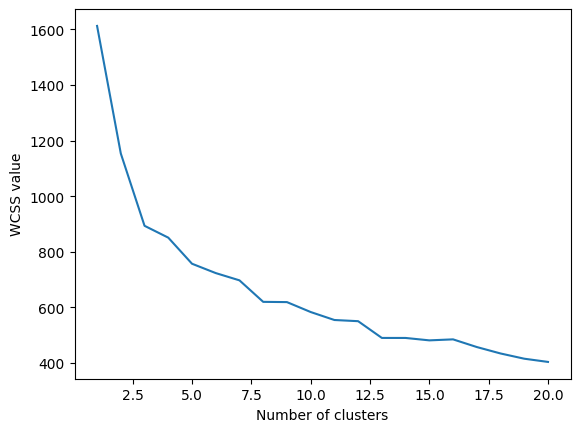

In [28]:
plt.plot(range(1,21),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS value')

In [29]:
scores=[]
for k in range(2,21):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.predict(X_train))
    scores.append(score)
print(scores)

[0.25867176328532104, 0.278356407445957, 0.257531912611752, 0.21027899034036632, 0.16906739288024916, 0.17175205056899656, 0.1881091503222527, 0.13244474104360565, 0.13738001776879097, 0.1451247030979268, 0.13917103655546081, 0.15261762900874412, 0.13357784119646637, 0.11438254040795293, 0.15243393126866486, 0.1150651483262249, 0.13918723451763423, 0.1316325490606932, 0.11319665040613999]


Text(0, 0.5, 'Silhouette_score')

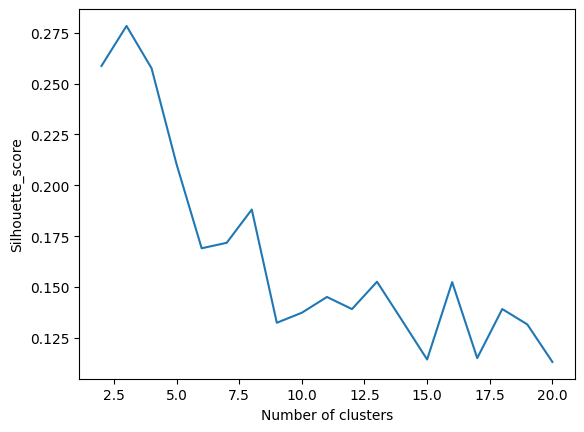

In [30]:
plt.plot(range(2,21),scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette_score')

In [31]:
kmeans=KMeans(n_clusters=3,init='k-means++')
kmeans.fit(X_train)
y_pred=kmeans.predict(X_test)
y_pred

array([1, 1, 2, 1, 0, 1, 0, 2, 0, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 2, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 2])